# Programming Project Title Here

## Programming for Data Analysis Project 

### Andrew Walker - G00398788@gmit.ie

https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm

https://www.usga.org/content/dam/usga/pdf/RSI/distance-insights-2021-docs/2020%20Distance%20Report%2026-01-2021.pdf

https://www.usga.org/content/dam/usga/pdf/2020/distance-insights/DIPR-FINAL-2020-usga.pdf

https://www.pgatour.com/stats/stat.101.y2021.html

1990 (no major innovations between 1980 and 1990), 2000, 2010, 2020 - simulate data for 2030
Driving distance avg 
Driving accuracy
Scoring average (actual)
GIR

In [1]:
# Regular expressions.
import re

# Convenient HTTP requests.
import requests as rq

# Dates and times
import datetime as dt

# Data frames
import pandas as pd

# FOr downloading
import urllib.request as urlrq

#numpy
import numpy as np

# pyplot
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

import math

### Driving distance

https://www.pgatour.com/stats/stat.101.y2021.html

In [2]:
# Fetch the driving distance stats URL.
resp = rq.get('https://www.pgatour.com/stats/stat.101.y2021.html')
# Have a look
resp



<Response [200]>

In [3]:
# get the current date and time
now = dt.datetime.now()

# format as a string
nowstr = now.strftime('%Y%m%d_%H%M%S')

In [4]:
# Create a file path for the original data
path = 'data/driving_stats_csv_' + nowstr + '.html'

path

'data/driving_stats_csv_20211201_163929.html'

In [5]:
# Save the original html file
with open(path, 'w') as f:
    f.write(resp.text)



In [6]:
# Compile the regular expression for matching lines
#re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')
#re_rank = re.compile(r'([0-9]{3})(.*)')



In [7]:
#re_rank


In [8]:


# File path for the csv file
path = 'data/driving_stats_csv_' + nowstr + '.csv'



In [9]:
path

'data/driving_stats_csv_20211201_163929.csv'

In [10]:
df = pd.read_csv('data\driving_stats.csv')

print(df.to_string()) 

    Driving Distance  Driving Accuracy   Scoring Average    GIR
0              322.1              74.50            68.06  74.22
1              322.0              73.86            68.76  72.54
2              315.3              71.84            68.76  72.10
3              314.0              71.36            68.80  71.70
4              313.8              71.29            68.81  71.69
5              312.8              69.87            68.94  71.55
6              312.4              69.73            69.03  71.54
7              312.0              69.57            69.07  71.54
8              311.6              69.49            69.10  70.91
9              311.0              69.28            69.13  70.87
10             311.0              68.63            69.27  70.83
11             310.2              68.44            69.41  70.80
12             309.8              68.27            69.42  70.65
13             309.6              68.27            69.42  70.63
14             309.0              68.24 

Name
Driving distance avg (https://www.pgatour.com/content/pgatour/stats/stat.101.y2021.html)
Driving accuracy % (https://www.pgatour.com/content/pgatour/stats/stat.102.y2021.html)
GIR (https://www.pgatour.com/content/pgatour/stats/stat.103.y2021.eoff.t013.html)
Fedex Cup Regular Season Standings (https://www.pgatour.com/content/pgatour/stats/stat.02394.y2021.html)

In [11]:
df_arr = df
df_arr.columns = ['Driving distance avg (yds)','Driving accuracy (%)','Scoring avg (%)','GIR']
#https://note.nkmk.me/en/python-pandas-t-transpose/

In [12]:
df_arr

,Driving distance avg (yds),Driving accuracy (%),Scoring avg (%),GIR
0,322.1,74.50,68.06,74.22
1,322.0,73.86,68.76,72.54
2,315.3,71.84,68.76,72.10
3,314.0,71.36,68.80,71.70
4,313.8,71.29,68.81,71.69
...,...,...,...,...
95,297.4,60.34,70.31,66.97
96,297.3,60.34,70.32,66.97
97,297.3,60.31,70.32,66.95
98,297.3,60.26,70.32,66.95


In [13]:
# Write a function / loop to plot these histograms
# Investigate how to determine what their distribution is... Skilearn? 

In [14]:
#distance2020 = df_arr.iloc[:,0]
#distance2020
x = df_arr.iloc[:,0]
x

0     322.1
1     322.0
2     315.3
3     314.0
4     313.8
      ...  
95    297.4
96    297.3
97    297.3
98    297.3
99    297.2
Name: Driving distance avg (yds), Length: 100, dtype: float64

(array([26., 30., 12.,  9., 10.,  6.,  4.,  1.,  0.,  2.]),
 array([297.2 , 299.69, 302.18, 304.67, 307.16, 309.65, 312.14, 314.63,
        317.12, 319.61, 322.1 ]),
 <BarContainer object of 10 artists>)

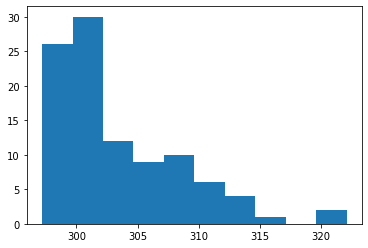

In [15]:
plt.hist(x)

In [16]:
#accuracy2020 = df_arr.iloc[:,1]
#accuracy2020
y = df_arr.iloc[:,1]
y

0     74.50
1     73.86
2     71.84
3     71.36
4     71.29
      ...  
95    60.34
96    60.34
97    60.31
98    60.26
99    60.20
Name: Driving accuracy (%), Length: 100, dtype: float64

(array([21., 23., 15., 16.,  8.,  7.,  5.,  2.,  1.,  2.]),
 array([60.2 , 61.63, 63.06, 64.49, 65.92, 67.35, 68.78, 70.21, 71.64,
        73.07, 74.5 ]),
 <BarContainer object of 10 artists>)

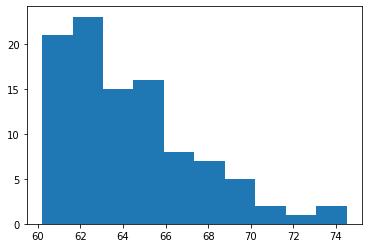

In [17]:
plt.hist(y)

In [18]:
#plt.scatter(distance2020, accuracy2020)
#m, b = np.polyfit(distance2020, accuracy2020, 1)
#plt.plot(distance2020, m*distance2020 + b)
#plt.show()
#https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

#plt.scatter(z,y)
#m, b = np.polyfit(z,y, 1)
#plt.plot(z, m*z + b)
#plt.show()
#https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python



In [19]:
z = df_arr.iloc[:,2]
z

0     68.06
1     68.76
2     68.76
3     68.80
4     68.81
      ...  
95    70.31
96    70.32
97    70.32
98    70.32
99    70.32
Name: Scoring avg (%), Length: 100, dtype: float64

(array([ 1.,  0.,  0.,  5.,  4.,  2., 10., 13., 26., 39.]),
 array([68.06 , 68.286, 68.512, 68.738, 68.964, 69.19 , 69.416, 69.642,
        69.868, 70.094, 70.32 ]),
 <BarContainer object of 10 artists>)

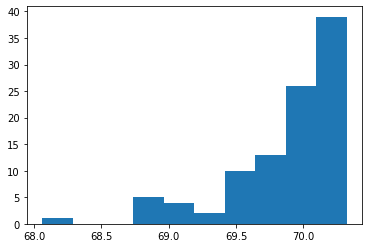

In [20]:
# make a note that low scoring is better
plt.hist(z)

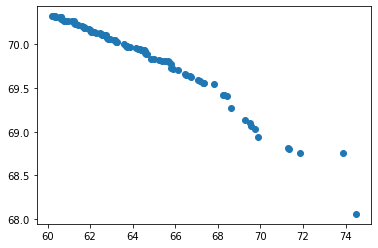

In [21]:
plt.scatter(y,z)

plt.show()

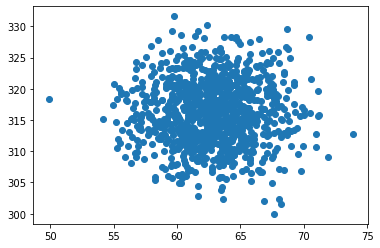

In [42]:
plt.scatter(y,x)
plt.show()

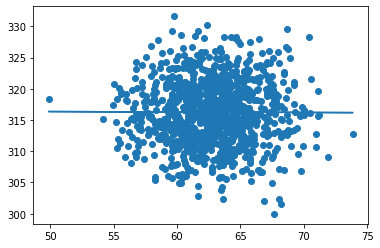

In [45]:
plt.scatter(y,x)
m, b = np.polyfit(y, x, 1)
plt.plot(y, m*y + b)
plt.show()

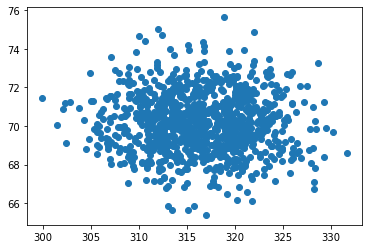

In [48]:
plt.scatter(x,zz)
plt.show()

In [23]:
zz = df_arr.iloc[:,3]
zz

0     74.22
1     72.54
2     72.10
3     71.70
4     71.69
      ...  
95    66.97
96    66.97
97    66.95
98    66.95
99    66.93
Name: GIR, Length: 100, dtype: float64

(array([19., 25., 15., 14., 13.,  6.,  5.,  2.,  0.,  1.]),
 array([66.93 , 67.659, 68.388, 69.117, 69.846, 70.575, 71.304, 72.033,
        72.762, 73.491, 74.22 ]),
 <BarContainer object of 10 artists>)

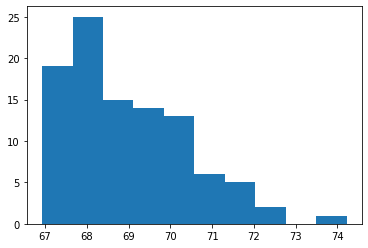

In [24]:
plt.hist(zz)

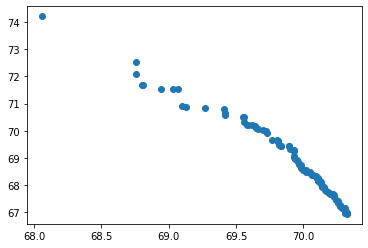

In [25]:
plt.scatter(z,zz)

plt.show()

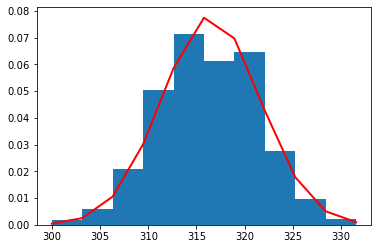

In [26]:
# Driving distacnce
mu, sigma = 316.5, 5.1

x = np.random.default_rng().normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(x, 10, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')

plt.show()

# https://www.statisticshowto.com/choose-bin-sizes-statistics/



In [27]:
x.max()

331.60689001313347

In [28]:
x.min()

299.95976752891835

In [29]:
len(x)

1000

X is a continuous random variable since time is measured. It is given that μ = 4 minutes. To do any calculations, you must know m, the decay parameter.

m=\frac{1}{\mu }. Therefore, m=\frac{1}{4}=0.25.

The standard deviation, σ, is the same as the mean. μ = σ

The distribution notation is X ~ Exp(m). Therefore, X ~ Exp(0.25)

The probability density function is f(x) = me–mx

m = 1/4
m

sd = m
sd

exponent = 1
e = math.exp(exponent)
#https://www.educative.io/edpresso/calculating-the-exponential-value-in-python

fx = ((0.25) * e**((-0.25)*(5)))
fx

#https://www.biob.in/2014/02/exponential-graph-using-python.html

a = 0.25
b = 0.25
c = 1
x = np.linspace(0, 2, 1000, endpoint = True)
y = (a * e**(-b*x)) + c

plt.plot(x, y, '-r', label=r'$y = 5e^{-2x} + 1$')

axes = plt.gca()
axes.set_xlim([x.min(), x.max()])
axes.set_ylim([y.min(), y.max()])

plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponential Curve')
plt.legend(loc='upper left')

plt.show()

np.random.exponential(64, 100)

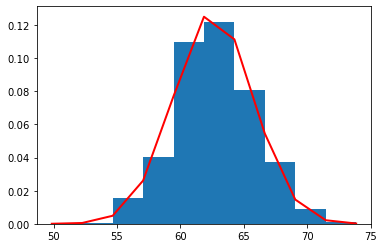

In [30]:
# Driving accuracy average
mu, sigma = 62.6, 3.1

y = np.random.default_rng().normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(y, 10, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')

plt.show()

# https://www.statisticshowto.com/choose-bin-sizes-statistics/



In [31]:
y

array([65.08182398, 63.24331995, 63.51460513, 69.70035094, 65.89429106,
       67.23787404, 60.7474913 , 66.29220868, 64.3063603 , 65.08023032,
       62.80406951, 66.1903443 , 63.65124451, 65.78502107, 64.48944786,
       62.79413485, 59.62979383, 60.94746826, 60.45180337, 68.19298732,
       60.41633745, 65.66729574, 63.43866515, 63.6057923 , 64.2967618 ,
       64.09393752, 61.97419843, 60.49300851, 61.28715885, 63.35538742,
       65.92549448, 65.38204589, 63.60884605, 60.64293689, 61.54595722,
       60.3961784 , 61.40436334, 63.01362836, 60.51717778, 55.94356151,
       63.82595711, 62.31958764, 55.54308524, 61.49058833, 62.59231503,
       66.69520599, 63.12182498, 60.10336469, 62.95634207, 61.14534318,
       56.06450744, 64.40170189, 62.31948835, 64.5800001 , 64.15177597,
       63.95726831, 67.19176245, 59.5046249 , 58.28855781, 62.87877592,
       59.08285173, 67.55427368, 68.01373684, 64.5965844 , 59.57640435,
       63.11425557, 58.46389471, 66.34049711, 59.29394257, 57.68

In [32]:
y.max(), y.min(), len(y)


(73.86527628961002, 49.861431555161, 1000)

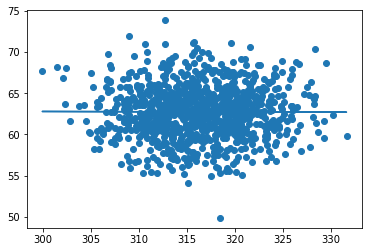

In [33]:
plt.scatter(x,y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.show()
#https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

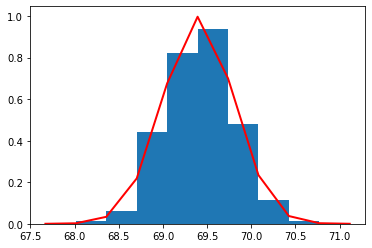

In [34]:
mu, sigma = 69.4, 0.4

z = np.random.default_rng().normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(z, 10, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')

plt.show()

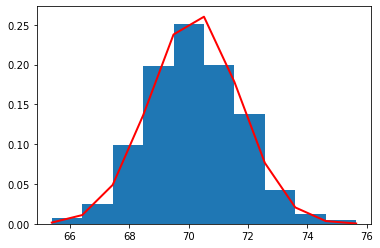

In [35]:
mu, sigma = 70.2, 1.5

zz = np.random.default_rng().normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(zz, 10, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')

plt.show()

In [36]:
my_array = np.array([[x],[y],[z],[zz]])
                    
my_array

array([[[318.84325856, 314.58698793, 320.40497174, ..., 316.9915243 ,
         318.77618443, 318.60650391]],

       [[ 65.08182398,  63.24331995,  63.51460513, ...,  65.59722865,
          67.07658565,  65.38848503]],

       [[ 68.96386941,  69.40587926,  69.39836685, ...,  69.94358794,
          69.91450702,  69.05563781]],

       [[ 75.64650218,  70.48715814,  66.81405902, ...,  69.14719391,
          71.82784578,  70.27896689]]])

In [37]:
#irisData = pd.read_csv('bezdekIris.data', header = None)  
#irisData.columns = ['Sepal Length (cm)','Sepal Width (cm)','Petal Length (cm)','Petal Width (cm)','Class']

In [38]:
df = pd.DataFrame(np.concatenate(my_array))


print(df)
print(type(df))

          0           1           2           3           4           5    \
0  318.843259  314.586988  320.404972  315.564567  321.570518  316.187274   
1   65.081824   63.243320   63.514605   69.700351   65.894291   67.237874   
2   68.963869   69.405879   69.398367   69.661686   69.598139   69.719948   
3   75.646502   70.487158   66.814059   69.549439   71.714934   70.694589   

          6           7           8           9    ...         990  \
0  314.913874  314.891949  309.505294  310.913420  ...  314.187273   
1   60.747491   66.292209   64.306360   65.080230  ...   64.083895   
2   69.376537   69.842822   69.509616   69.435937  ...   69.419608   
3   69.110893   70.087602   67.753501   69.577214  ...   72.175196   

          991         992         993         994         995         996  \
0  314.393715  319.789657  316.453027  315.105822  308.935542  323.000432   
1   62.761822   62.413169   63.833787   64.406937   59.534122   62.823281   
2   68.882402   69.606881   69.7

In [39]:
df_t = df.T
df_t.columns = ['Driving distance avg (yds)','Driving accuracy (%)','Scoring avg (%)','GIR']
#https://note.nkmk.me/en/python-pandas-t-transpose/

In [40]:
df_t.head()

,Driving distance avg (yds),Driving accuracy (%),Scoring avg (%),GIR
0,318.843259,65.081824,68.963869,75.646502
1,314.586988,63.243320,69.405879,70.487158
2,320.404972,63.514605,69.398367,66.814059
3,315.564567,69.700351,69.661686,69.549439
4,321.570518,65.894291,69.598139,71.714934


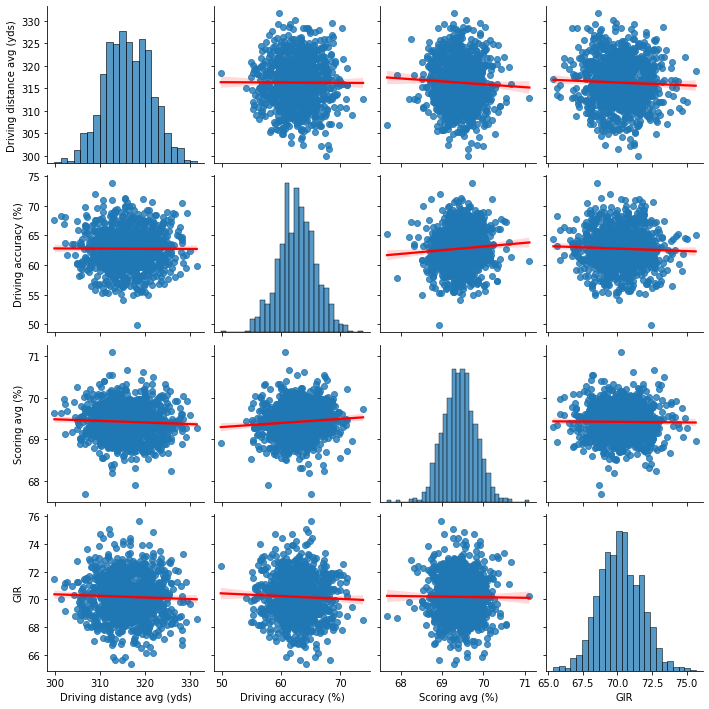

In [41]:
sns.pairplot(df_t, kind="reg", plot_kws={'line_kws':{'color':'red'}})
# https://stackoverflow.com/questions/50722972/change-the-regression-line-colour-of-seaborns-pairplot